# Tspoon

Tspoon is a Python library for time-series pre-processing, period conversion, normalization, visualization and more.

## Installation

Use the package manager [pip](https://pip.pypa.io/en/stable/) to install tspoon.


In [1]:
!pip install tspoon -U

  Attempting uninstall: tspoon
    Found existing installation: tspoon 0.2.1
    Uninstalling tspoon-0.2.1:
      Successfully uninstalled tspoon-0.2.1


In [2]:
import tspoon as tsp

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [4]:
warnings.filterwarnings("ignore")

## Usage

In [5]:
dat = pd.read_csv('./dat/시장금리(일별).csv', index_col=0)
dat.columns = ['call']
dat.index.name = None

In [6]:
gdp = pd.read_csv('./dat/국내총생산에 대한 지출(원계열, 실질, 분기 및 연간).csv', index_col=0, thousands=r',')
gdp.columns = ['소비','건설','설비','지재생','재고','수출','수입','통불']
gdp.index.name = None

### Using Fonts in Graphs

In [7]:
tsp.Hangul('C:/Windows/fonts/malgun.ttf')

### Date functions

In [8]:
# returns first and last days of a month 'M' in a year 'Y'
print( tsp.firstdate(2024,2) )
print( tsp.lastdate(2024,2) )

2024-02-01
2024-02-29


In [9]:
# returns the days between 'startdate' and 'enddate'
print( tsp.datesbetween('2024-02-25','2024-03-03') )
print( len(tsp.datesbetween('2024-02-25','2024-03-03')) )

['2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03']
8


In [10]:
# transform 'YYYYMMDD' to 'YYYY-MM-DD'
print( tsp.daytrans('20240630') )

2024-06-30


In [11]:
# returns a date that is 'x' days before and after a given 'basedate'
print( tsp.dayahead('2024-06-05',25) )
print( tsp.dayafter('2024-06-05',25) )


2024-05-11
2024-06-30


In [118]:
# returns the ISO calendar week number(YYYYWW), month(YYYYMM), and year(YYYY) of a day
print( tsp.day2week('2024-06-30') )
print( tsp.day2month('2024-06-30') )
print( tsp.day2year('2024-06-30') )

202426
202406
2024


In [13]:
# returns the quarter(YYYYqX) and month(YYYYMM)
print( tsp.month2quarter('202406') )
print( tsp.quarter2month('2024q2') )

2024q2
202406


In [14]:
# returns the first day(YYYY-MM-DD) of a week(YYYYWW) and month(YYYYMM)
print( tsp.week2day('202420') )
print( tsp.month2day('202406') )

2024-05-13
2024-06-01


<AxesSubplot:xlabel='index'>

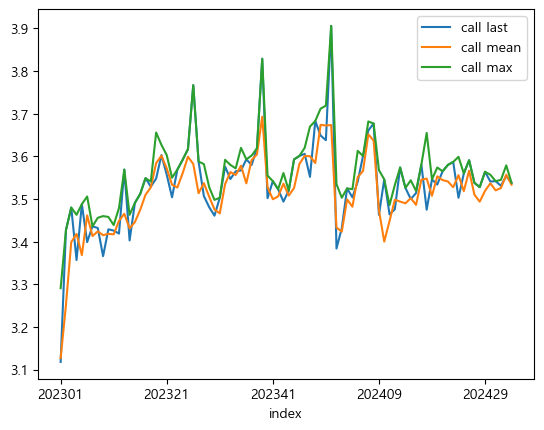

In [27]:
# generates a data frame with converted periods
fig, ax = plt.subplots(1,1)
dat_s = dat.loc['2023/01/01':]
tsp.GenDf_d2w(dat_s, aggregate='last').rename(columns={"call": "call last"}).plot(ax=ax)
tsp.GenDf_d2w(dat_s, aggregate='mean').rename(columns={"call": "call mean"}).plot(ax=ax)
tsp.GenDf_d2w(dat_s, aggregate='max').rename(columns={"call": "call max"}).plot(ax=ax)

In [35]:
# generates a data frame with converted periods
df_d = dat_s.copy()
df_w = tsp.GenDf_d2w(df_d, aggregate='mean')
df_m = tsp.GenDf_d2m(df_d, aggregate='mean')

<AxesSubplot:>

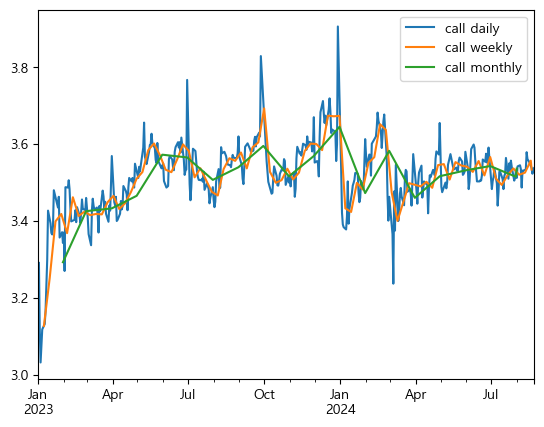

In [36]:
# generates a data frame with converted periods
fig, ax = plt.subplots(1,1)
df_wd = tsp.GenDf_w2d(df_d=None, df_w=df_w)
df_md = tsp.GenDf_m2d(df_d=None, df_m=df_m)

df_d.index = pd.PeriodIndex(df_d.index, freq='D')
df_wd.index = pd.PeriodIndex(df_wd.index, freq='D')
df_md.index = pd.PeriodIndex(df_md.index, freq='D')

df_d.rename(columns={"call": "call daily"}).plot(ax=ax)
df_wd.rename(columns={"call": "call weekly"}).plot(ax=ax)
df_md.rename(columns={"call": "call monthly"}).plot(ax=ax)

In [37]:
# generates a data frame with converted periods
df_wm = tsp.GenDf_w2m(df_w, aggregate='last')
df_mw = tsp.GenDf_m2w(df_w, df_m, interpolate='linear')
df_mq = tsp.GenDf_m2q(df_m, aggregate='last')
df_qm = tsp.GenDf_q2m(df_mq, interpolate='linear')
df_my = tsp.GenDf_m2y(df_m, aggregate='last')
df_ym = tsp.GenDf_y2m(df_my, interpolate='linear')

<AxesSubplot:>

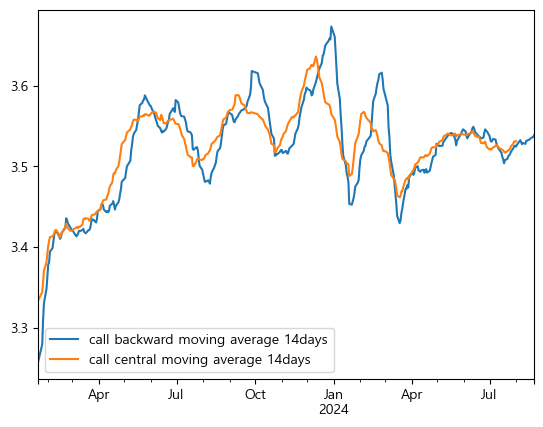

In [38]:
# returns backward and central moving average of a time series
fig, ax = plt.subplots(1,1)
d0 = tsp.bMA(dat.loc['2023/01/01':], lag_day=14, todf=True)
d1 = tsp.cMA(dat.loc['2023/01/01':], lag_day=14, lead_day=14, todf=True)

d0.index = pd.PeriodIndex(d0.index, freq='D')
d1.index = pd.PeriodIndex(d1.index, freq='D')

d0.rename(columns={"call": "call backward moving average 14days"}).plot(ax=ax)
d1.rename(columns={"call": "call central moving average 14days"}).plot(ax=ax)

In [49]:
df_m = tsp.GenDf_d2m(dat, aggregate='mean')

<AxesSubplot:>

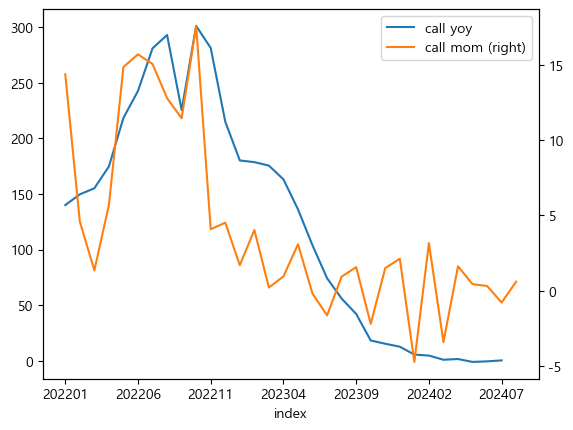

In [84]:
# returns yoy, mom, and un-yoy transformation
fig, ax = plt.subplots(1,1)
d_yoy = tsp.yoy(df_m, period=12, smooth=(1,1))
d_mom = tsp.mom(df_m)                                         # equivalent to tsp.mom(dat, period=1), tsp.yoy(dat, period=1)
# d_uny = tsp.unyoy(d_yoy, df_m, period=12, smooth=None)      # dat_level contains the level information of the beginning day

d_yoy.loc['2022/01/01':].rename(columns={"call": "call yoy"}).plot(ax=ax)
d_mom.loc['2022/01/01':].rename(columns={"call": "call mom"}).plot(ax=ax, secondary_y=True)

### Dummy generation

In [109]:
# generates dummy data frame 
df_d = dat.copy()
df_w = tsp.GenDf_d2w(df_d, aggregate='mean')
df_m = tsp.GenDf_d2m(df_d, aggregate='mean')
df_y = tsp.GenDf_m2y(df_m, aggregate='mean')

d0 = tsp.GenMonthDummy(df_m.index, MW='month')
d1 = tsp.GenMonthDummy(df_w.index, MW='week')
d2 = tsp.GenYearDummy(df_y.index)

<AxesSubplot:xlabel='index'>

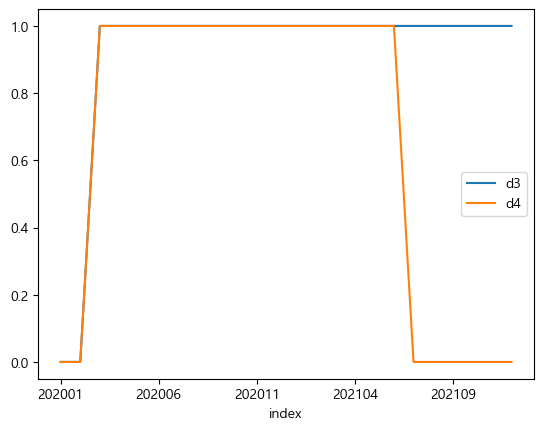

In [110]:
# generates structural break dummy data frame
df_m = tsp.GenDf_d2m(dat.loc['2020/01/01':'2021/12/01'])
d3 = tsp.GenStructBreakDummy(df_m.index, time='202003', MW='month')
d4 = tsp.GenStructBreakDummy(df_m.index, time='202003', time2='202106', MW='month')

fig, ax = plt.subplots(1,1)
d3.rename(columns={'sb':'d3'}).plot(ax=ax)
d4.rename(columns={'sb':'d4'}).plot(ax=ax)

### Duplicates check

In [111]:
# returns unique and duplicate observations
print( tsp.uniq(['202001','202001','202002','202003']) )
print( tsp.dupes(['202001','202001','202002','202003']) )

['202001', '202002', '202003']
['202001']


### Transformation functions

<AxesSubplot:>

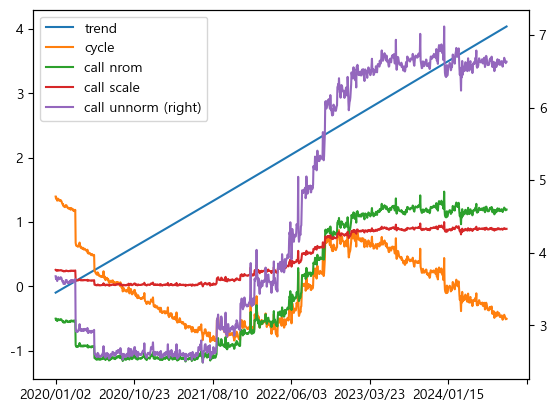

In [112]:
# returns unique and duplicate observations
fig, ax = plt.subplots(1,1)
# tsp.x13as(df_d, period='M', X12PATH='./x13as/')  # requires x12 ariam from us consensus
# tsp.hp(df_d, period='D')                         # period can be 'D', 'W', 'M', 'Q', 'Y'
d0 = tsp.hptrend(df_d, lamb=1600*((365/4)**4))
d1 = tsp.hpcycle(df_d, lamb=1600*((365/4)**4))
d2 = tsp.norm(df_d)                     # (x-mean(x))/std(x) normalization
d3 = tsp.scale(df_d)                    # (x-min(x))/(max(x)-min(x)) rescale
d4 = tsp.unnorm(df_d, df_d.mean(), df_d.std())

d0.plot(ax=ax)
d1.plot(ax=ax)
d2.rename(columns={"call": "call nrom"}).plot(ax=ax)
d3.rename(columns={"call": "call scale"}).plot(ax=ax)
d4.rename(columns={"call": "call unnorm"}).plot(ax=ax, secondary_y=True)

In [113]:
df_future = pd.DataFrame(index=tsp.datesbetween('2024-08-23','2024-12-31'))
df_future['call'] = np.nan
df_future = pd.concat([df_d,df_future], axis=0)

<AxesSubplot:>

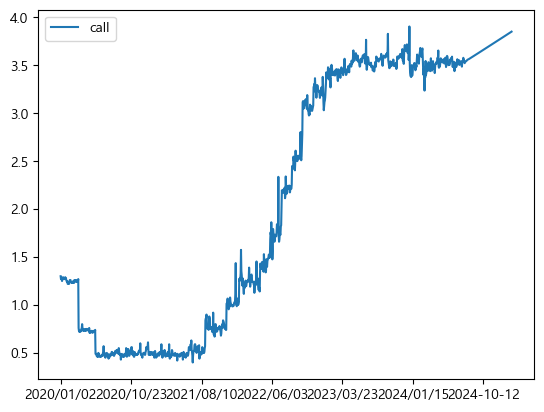

In [114]:
# returns arima extrapolated time series
tsp.extrapolate(df_future, maxlags=10).plot()

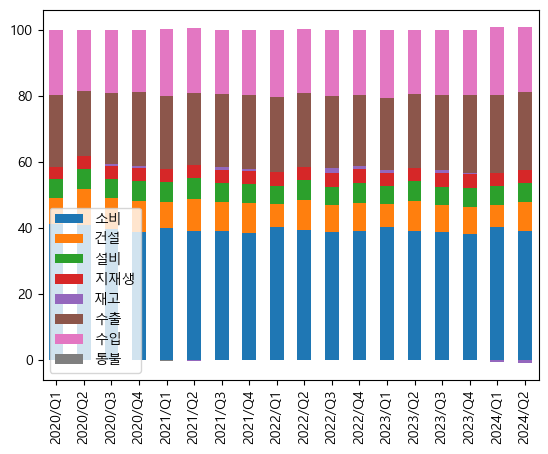

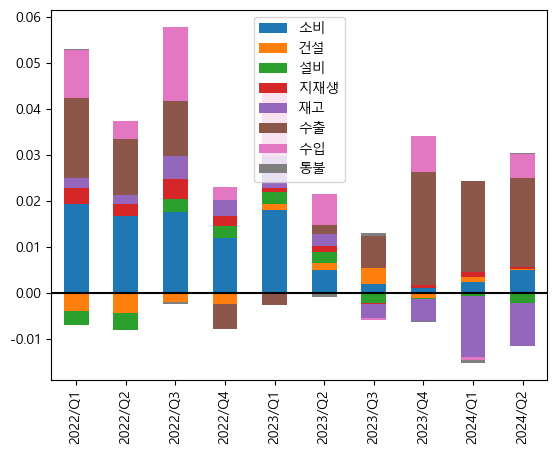

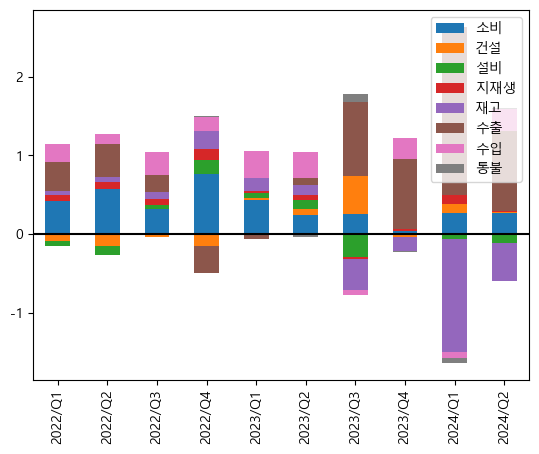

In [115]:
# returns proportaion, contribution, 
tsp.proportion(gdp).plot.bar(stacked=True)
tsp.contribution(gdp, period=4).loc['2021q1':].plot.bar(stacked=True)
plt.axhline(y=0, color='k')
tsp.contribution_proportion(gdp, period=4).loc['2021q1':].plot.bar(stacked=True)
plt.axhline(y=0, color='k')